<a id="tercero"></a>
## 3. [Opcional] Cadenas de Markov
---
> *Dado que esta actividad es opcional, el puntaje obtenido si se realiza será equivalente a un bonus sobre el promedio final de notas de tareas.*

En esta sección emplearemos un modelo **no supervisado** especializado en secuencias, como lo son las cadenas de markov, para modelar series de tiempo, es decir una serie de registros (tı́picamente valores reales) regularmente indexados en el tiempo. Parea ello utilizaremos el dataset denominado “*international airline passengers*” [[5]](#refs). La tarea consiste en predecir el número de pasajeros (miles) en vuelos internacionales.


<img src="https://i.imgur.com/Fyf0LK6.png" title="Title text" width="80%" />

Los datos pueden ser descargados a través del siguiente __[link](https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line)__. También están disponibles en Kaggle a través del siguiente __[link](https://www.kaggle.com/andreazzini/international-airline-passengers)__

Para la actividad se trabajará con la librería de *sklearn* para aprendizaje sobre secuencias HMM (*Hidden Markov Model*), también puede acudir a la documentación online a través del siguiente __[link](https://hmmlearn.readthedocs.io/en/latest/tutorial.html#available-models)__.
```
pip install --upgrade hmmlearn
conda install -c omnia hmmlearn

Primeramente es necesario mencionar lo que son los modelos NO supervisados de Machine Learninng en contraste con los que ya fueron estudiados con anterioridad a través de las otras tareas. Este úlltimo depende únicamente de la información observada y generalmente es utilizado para tratar variables que no se posea información certera, como un conjunto de datos aleatorios.

A continuación se importarán algunas librerias y se definirá una función que calcule la matriz de estados.

In [1]:
import pandas as pd
from hmmlearn import hmm
import numpy as np
import seaborn as sns
from scipy.stats import norm
import itertools
import matplotlib.pyplot as plt
from hmmlearn.hmm import GMMHMM
from  sklearn.metrics import mean_squared_error as mse

In [2]:
def plot_state_matrix(cm, states,title='Transition Probabilities',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(states))
    plt.xticks(tick_marks, states)
    plt.yticks(tick_marks, states)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")
    plt.ylabel('Origin state')
    plt.xlabel('Destination state')
    plt.tight_layout()

> a) Escriba una función que cargue los datos, los divida en conjuntos de entrenamiento y de pruebas. En base a como trabajan las cadenas de markov ¿Es necesario escalar los datos?

Sinceramente no le veo la utilidad de reescalar los datos, debido al hecho de que como se utilizarán cadenas de Markov, el resultado siguiente dependerá del anterior (vea dataframe)

In [3]:
name_f = "international-airline-passengers.csv"
dataframe = pd.read_csv(name_f,sep=';',usecols=[1],engine='python',skipfooter = 3)
dataframe[:] = dataframe[:].astype('float32')
X_train, X_test = dataframe[:96].values, dataframe[96:].values

El dataframe consta de solo una entrada

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    144 non-null float32
dtypes: float32(1)
memory usage: 656.0 bytes


In [5]:
dataframe.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298615
std,119.966301
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


Los datos en cuestión rondan entre el intervalo 104-622 y corresponden a valores enteros como muestra la visualizacion siguiente del dataframe:

In [6]:
dataframe.head(10)

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0
5,135.0
6,148.0
7,148.0
8,136.0
9,119.0


Tambien cabe destacar que tanto los conjuntos de entrenamiento como prueba son los mismos y es por la razón que ya se mencionó, que cada estado actual depende del anterior y así el siguiente del actual.

> b) Para resolver el problema defina un modelo de cadena de markov de primer orden con estados ocultos (*hidden markov model*) simple con un generador de datos observados que se distribuye normal $p(x_t|s_t)=\mathcal{N}(\mu_{s},\sigma_{s})$. Para evaluar mida la log-verosimilitud (*log-likelihood*) del modelo sobre el conjunto de entrenamiento y de pruebas. Comente

Solo por curiosidad quise ver como influenciaba la cantidad de estados considerados sobre el score del modelo, el cual tiene por nombre log verosimilitud, que mide el valor probabilistico de algun dato con respecto a los demás para determinar los siguientes, es decir, el peso del valor actual para la siguiente transición.

C:\Users\kzep\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\kzep\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\kzep\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\k

C:\Users\kzep\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\kzep\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\kzep\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\k

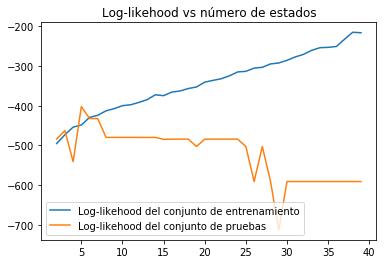

In [7]:
np.random.seed(30)
x=[]
y =[]
y_test=[]
for i in range(2,40,1):
#n_state = 8
    markov_model = hmm.GaussianHMM(n_components=i, n_iter=500)
    markov_model.fit(X_train)
    x.append(i)
    y.append(markov_model.score(X_train))
    y_test.append(markov_model.score(X_test))   
plt.plot(x,y,label="Log-likehood del conjunto de entrenamiento")
plt.plot(x,y_test,label="Log-likehood del conjunto de pruebas")
plt.title("Log-likehood vs número de estados")
plt.legend()
plt.show()
    

Se observa que esta probabilidad cada vez aumenta y es por el hecho de que al considerar más estados, implicitamente se consideran más clases y el problema se transforma (no del todo) en uno de clasificación, pero que se ve limitado al momento de predecir el estado siguiente por overfitting

Para concluir se considerarán 5 estados.

In [8]:
n_state = 5
markov_model = hmm.GaussianHMM(n_components=n_state, n_iter=500)
markov_model.fit(X_train)

print("Log-likehood con 5 estados del conjunto de entrenamiento",markov_model.score(X_train))
print("Log-likehood con 5 estados del conjunto de pruebas",markov_model.score(X_test))


Log-likehood con 5 estados del conjunto de entrenamiento -448.497460299831
Log-likehood con 5 estados del conjunto de pruebas -402.1319269961957


C:\Users\kzep\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


En primer lugar se genera un conjunto de probabilidad que se distribuye normalmente.

Cabe destacar que log-verosimilitud calcula el logaritmo del error probabilistico del conjunto de entrenamiento considerando 100 iteraciones máximas.

> c) Analice cualitativamente lo que aprendió el modelo a través de las distribuciones de probabilidad de las observaciones para un estado oculto dado, esto es, $p(x_t|s_t)$, y las distribuciones de probabilidad de transición $p(s_{t+1}|s_t)$. Comente.


C:\Users\kzep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


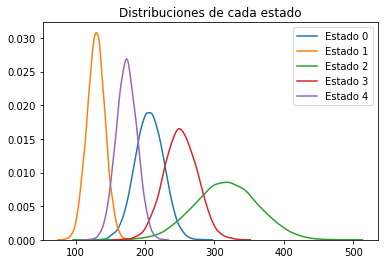

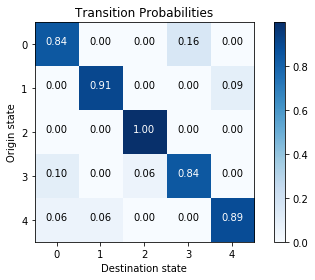

In [9]:
for i in range(n_state):
    r = norm(markov_model.means_[i], np.sqrt( markov_model.covars_[i,0])).rvs(10000)
    sns.distplot(r,kde=True, hist=False,label="Estado "+str(i))
plt.legend()
plt.title("Distribuciones de cada estado")
plt.show()
plot_state_matrix(markov_model.transmat_,np.arange(n_state))

Aquí lo importante es que se clasifican los distintos estados a través de varias distribuciones de probabilidad que se intercectan por el hecho de que en cadena de Markov, la probabilidad de un evento depende de alguno anterior. El segundo diagrama resume el comportamiento de estas transiciones ya mencionadas. En la columna X se distribuyen de manera ordena los intervalos por categorí.
El área bajo la curva en cada intervalo.

> d) Gracias a que el modelo no predice un valor único, sino que una distribución de probabilidad (incerteza en cada valor continuo), realice un gráfico de ésto, es decir, visualice el intervalo de confianza en que el modelo predice en cada instante de tiempo, dado el estado oculto, y contrarréstelo con la secuencia original. Hágalo para el conjunto de entrenamiento y de pruebas

El gráfico muestra el comportamiento de los datos a través de los distintos estados que va pasando. 

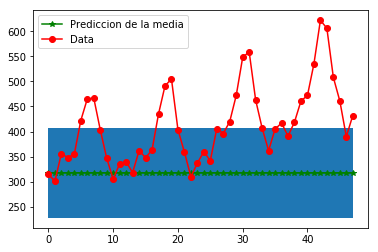

In [10]:
X_state = markov_model.predict(X_test) #predice el estado, no el valor
plt.fill_between(np.arange(X_test.shape[0]),markov_model.means_[X_state][:,0]-1.96*np.sqrt(markov_model.covars_[X_state])[:,0,0], markov_model.means_[X_state][:,0]+1.96*np.sqrt(markov_model.covars_[X_state])[:,0,0])
plt.plot(markov_model.means_[X_state][:,0],'g*-',label="Prediccion de la media")
plt.plot(X_test,'ro-',label="Data") #-- here put train or val
plt.legend()

plt.show()

> e) Dado que se ve que el problema no puede ser modelado de manera adecuada con 3 estados distintos (valores que puede tomar el estado oculto en cada instante de tiempo, $s_t$). Experimente con variar la cantidad de éstos  ¿Qué sucede si aumenta hasta tener la misma cantidad de estados que la cantidad de datos? Visualice lo que estime conveniente, además de medir el *log-likelihood* en cada conjunto.

Debido a que el enunciado anteriormente no especifico que esto último debiese ser con 3 estados y ya se experimentó, se colocarán 96 estados, de modo que el sistema arroja un error porque siempre van a existir transiciones que pasan a más de un valor distinto, por lo que debiese ser eso la causa del error.

Se dejará comentado para evitar problemas en la ejecucion general del problema.

In [11]:
#n_state= 96
#markov_model = hmm.GaussianHMM(n_components=n_state, n_iter=100)
#markov_model.fit(X_train)

#print("Log-likehood con 100 estados del conjunto de entrenamiento",markov_model.score(X_train))
#print("Log-likehood con 100 estados del conjunto de pruebas",markov_model.score(X_test))

> f) Debido a que el modelo no predice el valor continuo directamente, sino que predice el estado oculto de cada instante de tiempo, es necesario hacer un muestreo para obtener el valor continuo (o si desea, quedarse con la media). Realice este muestreo y evalúe la métrica de MSE (*Mean Square Error*) sobre el conjunto de pruebas.

Como se trabaja con error cuadratico y los valores en cuestión rondan en un intervalo (0,200)

In [12]:
X_state = markov_model.predict(X_test) #predice el estado, no el valor
X_output = norm( markov_model.means_[X_state], np.sqrt(markov_model.covars_[X_state][:,0]) ).rvs() #rvs is sample
print("Error Asociado = ",mse(X_test, X_output))

Error Asociado =  18641.354365435993


> ¿Cambian mucho los resultados si se emplea una mezcla de gausianas como modelo para $p(x_t|s_t)$ en ves de que cada estado pertenezca a un único modelo Gausiano (distribución normal)?

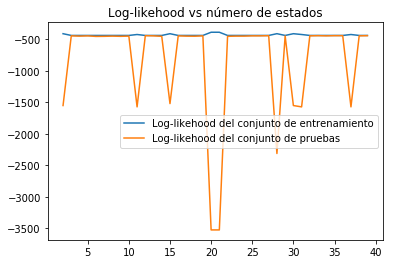

In [13]:
x=[]
y =[]
y_test=[]
for i in range(2,40,1):
#n_state = 8
    markov_model = GMMHMM(n_components=n_state, n_mix=5, n_iter=1000)
    markov_model.fit(X_train)
    x.append(i)
    y.append(markov_model.score(X_train))
    y_test.append(markov_model.score(X_test))   
plt.plot(x,y,label="Log-likehood del conjunto de entrenamiento")
plt.plot(x,y_test,label="Log-likehood del conjunto de pruebas")
plt.title("Log-likehood vs número de estados")
plt.legend()
plt.show()

En el gráfico se ve un comportamiento casi oscilatorio del log likehood a medida que cambian los números de estados y es porque no existe una dependencia directa entre la cantidad de estados al considerar una única distribución normal, por lo que debiese entorpecerse las predicciones pero no necesariamente el entrenamiento que debiese tener un comportamiento lineal al solo considerar una distribucion.
Al aplicar una distribución de mezclas gaussianas, permitimos que la dsitribución de probabilidad no sea determinada únicamente por una gaussiana, sinó que sea por la sobreposicione de varias, de esta forma, las distribuciones pueden no estar tan centradas.

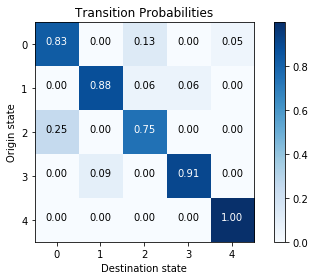

In [14]:
plot_state_matrix(markov_model.transmat_,np.arange(n_state))#da lo mismo lo anterior si consideramos 1 estado solamente.

In [15]:
X_state = markov_model.predict(X_test) #predice el estado, no el valor
#X_output = norm( markov_model, np.sqrt(markov_model.covars[:,0]) ).rvs() #rvs is sample
print("Error Asociado = ",mse(X_test, X_state))

Error Asociado =  173706.8125


Se redujo el error, pero debe ser por el hecho de que las variables poseen una distribucion más parecida a una normal.